In [3]:
import cv2 as cv
import numpy as np

In [1]:
from Datasets import Datasets

ac_dataset = Datasets.datasets()["AcMüDüHo"]
train = ac_dataset[0].images

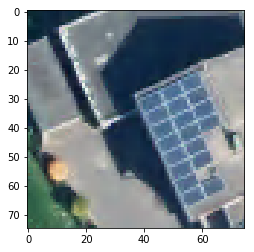

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train[1][:,:,::-1])

In [43]:
orig = train[1]
orig = (orig * 255).astype(np.uint8)

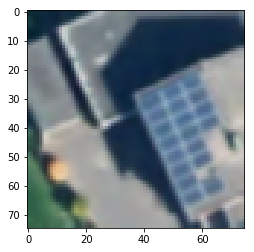

In [117]:
blur = cv.GaussianBlur(orig,(3,3),0)
plt.imshow(blur[:,:,::-1])

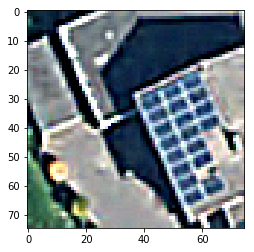

In [118]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened = cv.filter2D(blur, -1, kernel)
plt.imshow(sharpened[:,:,::-1])

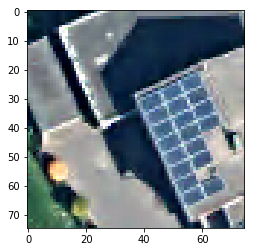

In [119]:
blur2 = cv.GaussianBlur(orig, (0, 0), 3);
sharpened2 = cv.addWeighted(orig, 1.5, blur2, -0.5, 0);
plt.imshow(sharpened2[:,:,::-1])


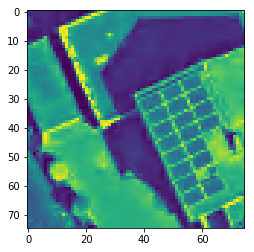

In [120]:
gray = cv.cvtColor(sharpened2, cv.COLOR_BGR2GRAY)

plt.imshow(gray)

In [95]:
75*75, int(0.7 * gray.shape[0] * gray.shape[1]), gray.size

(5625, 3937, 5625)

47


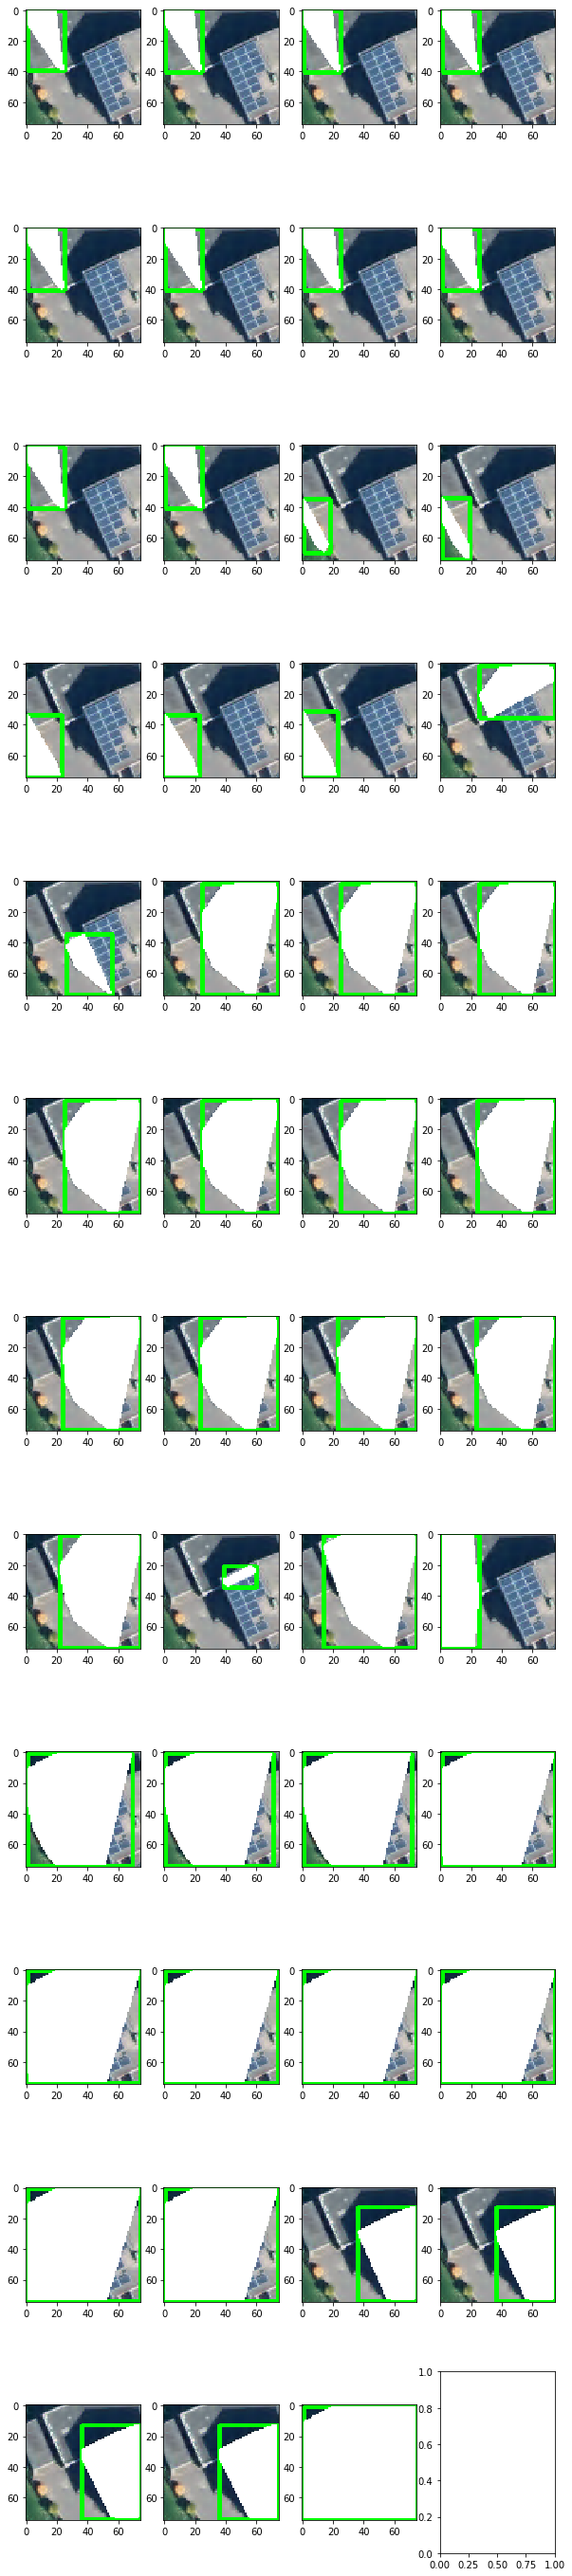

In [121]:
import math

mser = cv.MSER_create(_max_area = int(0.7 * gray.shape[0] * gray.shape[1]), _max_variation=0.05)
vis = orig.copy()

regions, _ = mser.detectRegions(gray)
hulls = [cv.convexHull(p.reshape(-1, 1, 2)) for p in regions]
#cv.polylines(vis, hulls[4], 1, (0, 255, 0))

msers = []
for hull in hulls:
    vis = orig.copy()  
    x,y,w,h = cv.boundingRect(hull)
    cv.rectangle(vis,(x,y),(x+w,y+h),(0,255,0),2)
    cv.drawContours(vis, [hull], -1, (255,255,255), -1)
    msers.append(vis)

ncols = 4
nrows = math.ceil(len(msers) / ncols)
_, ax = plt.subplots(nrows, ncols, figsize=(10, 50))

r = 0
c = 0
for mser in msers:
    if c > 0 and c % ncols == 0:
        r += 1
        c = 0
    ax[r, c].imshow(mser[:,:,::-1])
    c += 1

print(len(msers))    

In [77]:
polygons = []
for hull in hulls:
    epsilon = 0.1 * cv.arcLength(hull, True)
    polygons.append(cv.approxPolyDP(hull, epsilon, True))
    
polygons

[array([[[23, 39]],
 
        [[ 7,  6]]], dtype=int32), array([[[24, 39]],
 
        [[ 1,  1]],
 
        [[19,  1]]], dtype=int32), array([[[24, 39]],
 
        [[ 1,  1]],
 
        [[19,  1]]], dtype=int32), array([[[23, 40]],
 
        [[ 1,  1]],
 
        [[19,  1]]], dtype=int32), array([[[23, 40]],
 
        [[ 1,  1]],
 
        [[19,  1]]], dtype=int32), array([[[23, 40]],
 
        [[ 1,  1]],
 
        [[19,  1]]], dtype=int32), array([[[23, 40]],
 
        [[ 1,  1]],
 
        [[20,  1]]], dtype=int32), array([[[23, 40]],
 
        [[ 1,  1]],
 
        [[20,  1]]], dtype=int32), array([[[23, 40]],
 
        [[ 1,  1]],
 
        [[20,  1]]], dtype=int32), array([[[23, 40]],
 
        [[ 1,  1]],
 
        [[20,  1]]], dtype=int32), array([[[24, 40]],
 
        [[ 1,  1]],
 
        [[20,  1]]], dtype=int32), array([[[24, 40]],
 
        [[ 1,  1]],
 
        [[20,  1]]], dtype=int32), array([[[14, 69]],
 
        [[ 1, 35]]], dtype=int32), array([[[14, 69]],
 
        

In [92]:
def bb_area(hull):
    x,y,w,h = cv.boundingRect(hull) 
    return w * h

sorted_hulls = sorted(hulls, key = lambda x: bb_area(x))
sorted_hulls


[array([[[59, 25]],
 
        [[41, 34]],
 
        [[39, 32]],
 
        [[39, 29]],
 
        [[53, 22]],
 
        [[56, 21]],
 
        [[57, 21]],
 
        [[59, 23]]], dtype=int32), array([[[17, 64]],
 
        [[14, 69]],
 
        [[ 9, 65]],
 
        [[ 1, 49]],
 
        [[ 1, 35]]], dtype=int32), array([[[18, 73]],
 
        [[16, 73]],
 
        [[ 8, 64]],
 
        [[ 1, 49]],
 
        [[ 1, 34]],
 
        [[18, 64]]], dtype=int32), array([[[22, 73]],
 
        [[ 1, 73]],
 
        [[ 1, 34]],
 
        [[19, 64]]], dtype=int32), array([[[22, 73]],
 
        [[ 1, 73]],
 
        [[ 1, 34]],
 
        [[ 2, 35]],
 
        [[20, 65]]], dtype=int32), array([[[22, 73]],
 
        [[ 1, 73]],
 
        [[ 1, 32]],
 
        [[20, 65]]], dtype=int32), array([[[24, 39]],
 
        [[22, 39]],
 
        [[20, 38]],
 
        [[ 1, 10]],
 
        [[ 1,  1]],
 
        [[19,  1]]], dtype=int32), array([[[24, 39]],
 
        [[23, 40]],
 
        [[20, 38]],
 
        [[ 1, 

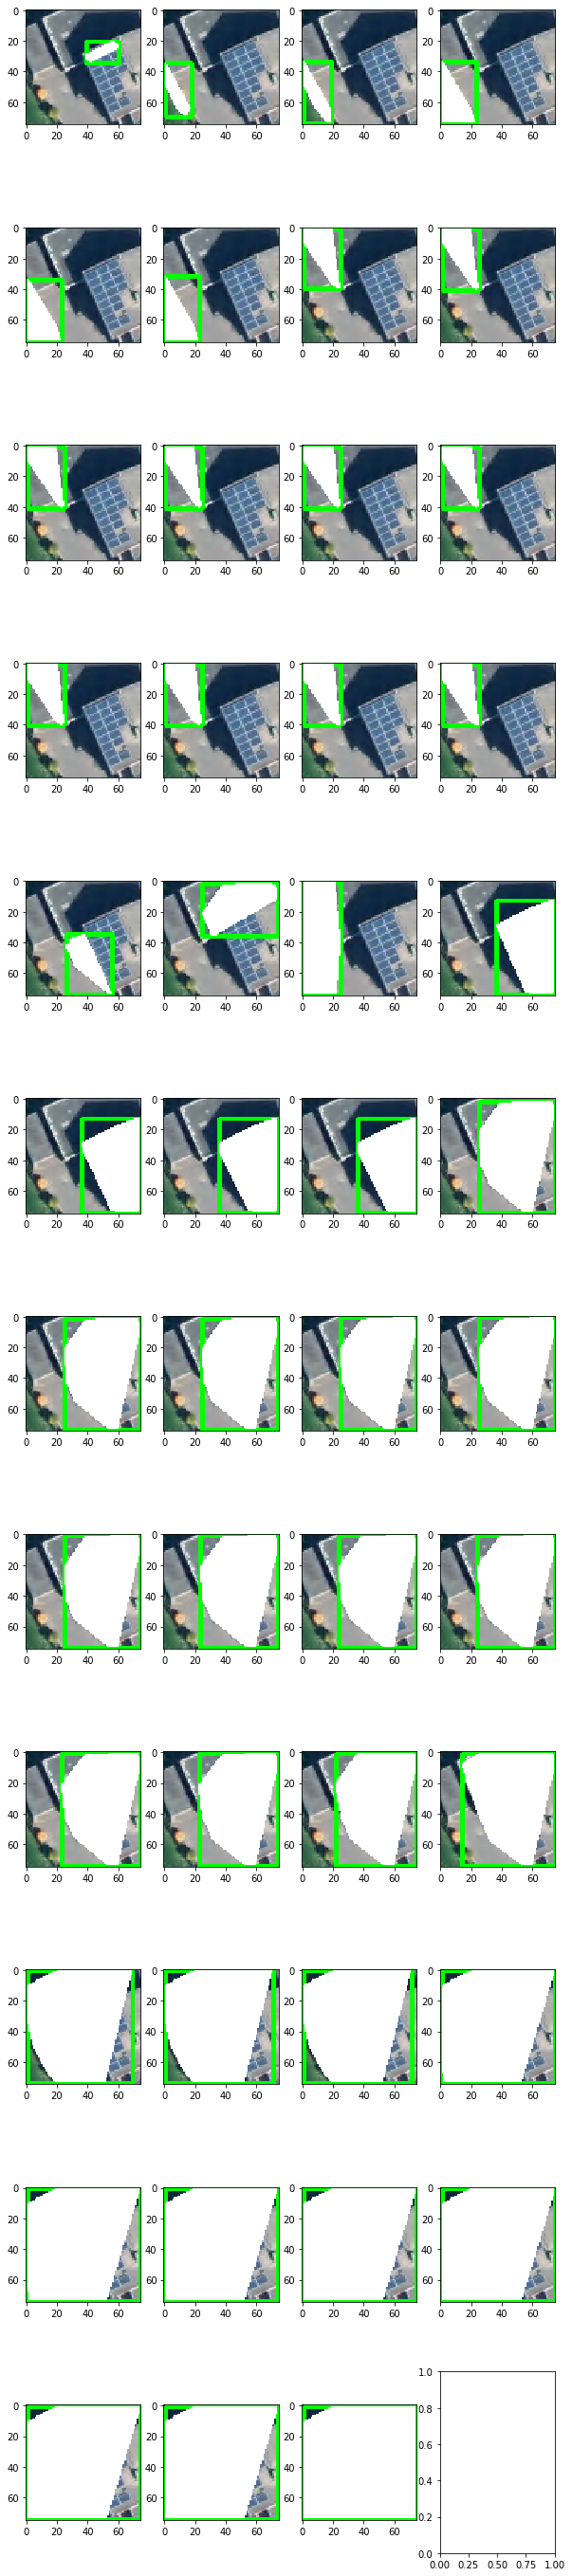

In [93]:
sorted_msers = []
for hull in sorted_hulls:
    vis = orig.copy()  
    x,y,w,h = cv.boundingRect(hull)
    cv.rectangle(vis,(x,y),(x+w,y+h),(0,255,0),2)
    cv.drawContours(vis, [hull], -1, (255,255,255), -1)
    sorted_msers.append(vis)

ncols = 4
nrows = math.ceil(len(sorted_msers) / ncols)
_, ax = plt.subplots(nrows, ncols, figsize=(10, 50))

r = 0
c = 0
for mser in sorted_msers:
    if c > 0 and c % ncols == 0:
        r += 1
        c = 0
    ax[r, c].imshow(mser[:,:,::-1])
    c += 1


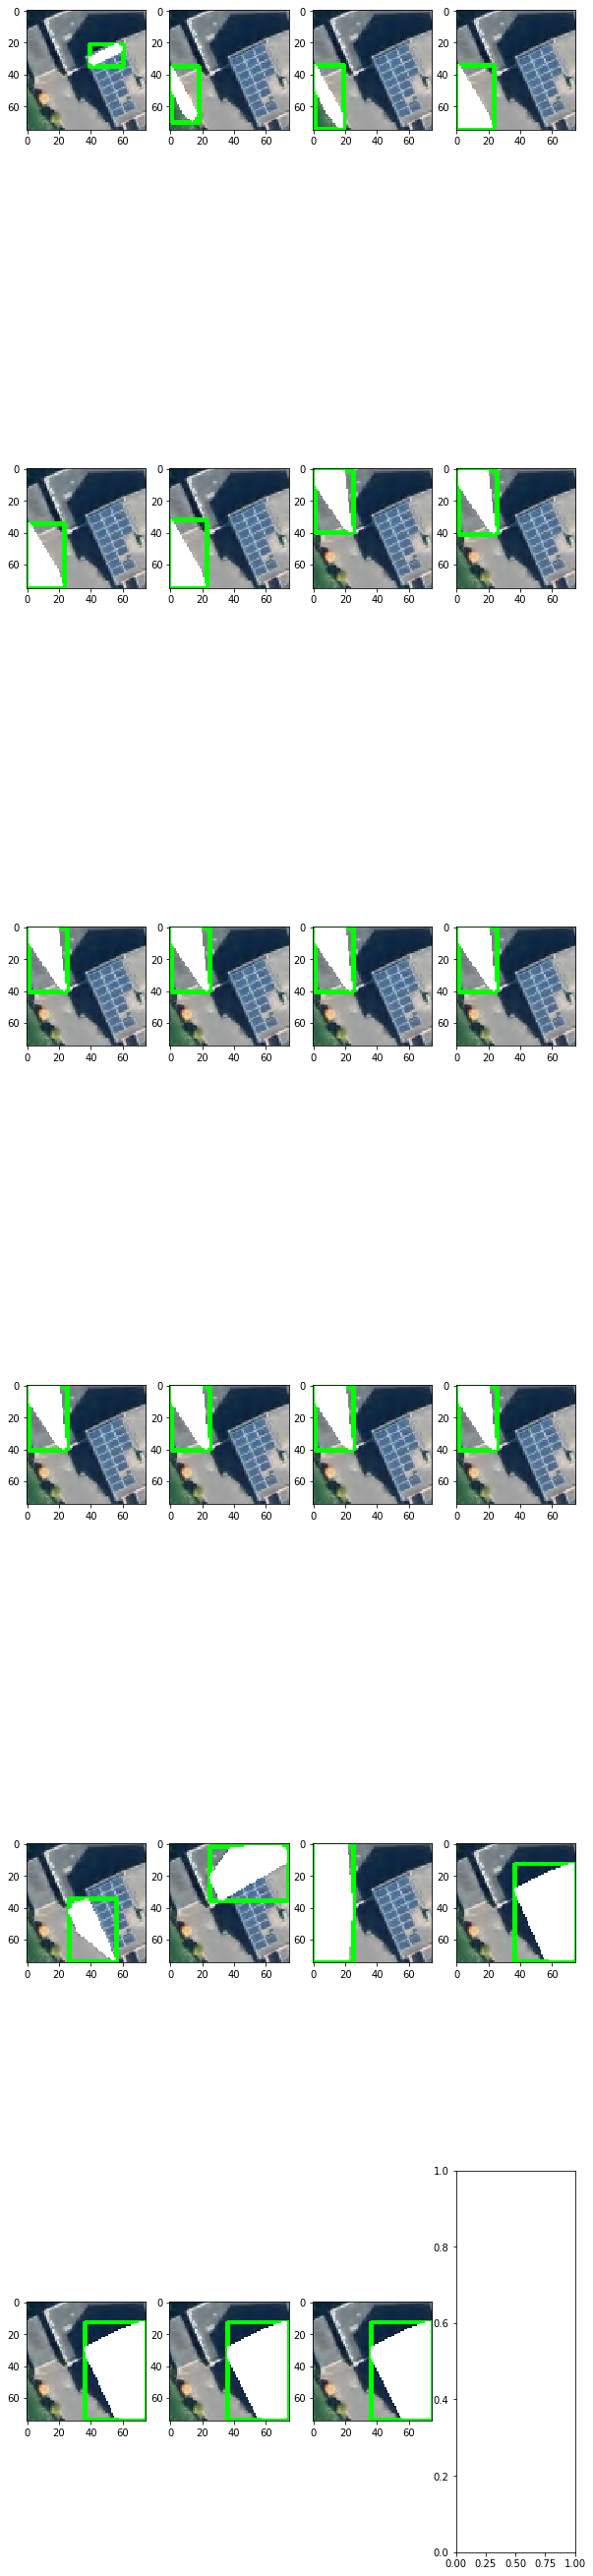

In [98]:
filtered_hulls = [hull for hull in sorted_hulls if bb_area(hull) <= 0.6 * gray.size]

filtered_msers = []
for hull in filtered_hulls:
    vis = orig.copy()  
    x,y,w,h = cv.boundingRect(hull)
    cv.rectangle(vis,(x,y),(x+w,y+h),(0,255,0),2)
    cv.drawContours(vis, [hull], -1, (255,255,255), -1)
    filtered_msers.append(vis)

ncols = 4
nrows = math.ceil(len(filtered_msers) / ncols)
_, ax = plt.subplots(nrows, ncols, figsize=(10, 50))

r = 0
c = 0
for mser in filtered_msers:
    if c > 0 and c % ncols == 0:
        r += 1
        c = 0
    ax[r, c].imshow(mser[:,:,::-1])
    c += 1


In [99]:
hull = filtered_hulls[-1]

epsilon = 0.1 * cv.arcLength(hull, True)
polygon = cv.approxPolyDP(hull, epsilon, True)

bb_area(hull), cv.contourArea(polygon)

(2318, 974.0)

In [131]:
contour = filtered_hulls[-1]
mask = np.zeros(orig.shape[0:2], dtype=np.uint8)
cv.drawContours(mask, [contour], -1, (255,255,255), -1)
mask.shape

(75, 75)

In [ ]:
def plot_hist(hist_image, mask=None)
    for i, col in enumerate(["b", "g", "r"]):
        hist = cv.calcHist([hist_image], [i], mask, [256], [0, 255])
        plt.plot(hist,color = col)
        plt.xlim([0,256])

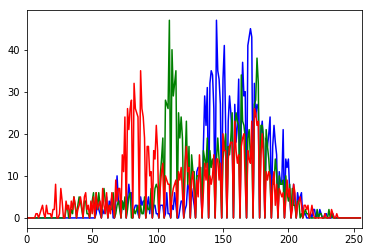

In [135]:
for i, col in enumerate(["b", "g", "r"]):
    hist = cv.calcHist([orig], [i], mask, [256], [0, 255])
    plt.plot(hist,color = col)
    plt.xlim([0,256])

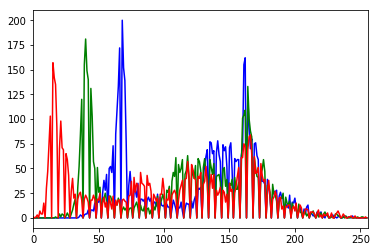

In [136]:
for i, col in enumerate(["b", "g", "r"]):
    hist = cv.calcHist([orig], [i], None, [256], [0, 255])
    plt.plot(hist,color = col)
    plt.xlim([0,256])